In [3]:
%%capture
!pip install shap

In [87]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [29]:
X, y = shap.datasets.boston()

In [30]:
X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
X.shape

(506, 13)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## LinearRegression

In [83]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_linear_regression = model_lr.predict(X_test)

In [84]:
#print('score ', model.score(X_test, y_test))
print('r2_score ', r2_score(y_test,y_pred_linear_regression))
print('mean_absolute_error ', mean_absolute_error(y_test,y_pred_linear_regression))
print('mean_squared_error ', mean_squared_error(y_test,y_pred_linear_regression))

r2_score  0.6403897651093908
mean_absolute_error  3.697860837747242
mean_squared_error  25.182477578236682


##RandomForestRegressor

In [85]:
model_rf = RandomForestRegressor(n_estimators=1000, max_depth=25)
model_rf.fit(X_train, y_train)
y_pred_random_forestregressor = model_rf.predict(X_test)

In [86]:
print('r2_score ', r2_score(y_test,y_pred_random_forestregressor))
print('mean_absolute_error ', mean_absolute_error(y_test,y_pred_random_forestregressor))
print('mean_squared_error ', mean_squared_error(y_test,y_pred_random_forestregressor))

r2_score  0.8271865006428681
mean_absolute_error  2.481623622047249
mean_squared_error  12.101635744881959


##XGBoost

In [109]:
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror')
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

In [110]:
print('r2_score ', r2_score(y_test,y_pred_xgb))
print('mean_absolute_error ', mean_absolute_error(y_test,y_pred_xgb))
print('mean_squared_error ', mean_squared_error(y_test,y_pred_xgb))

r2_score  0.8683818199667359
mean_absolute_error  2.283256644902267
mean_squared_error  9.216845200705235


## Shap

In [113]:
model = xgb.XGBRegressor(objective ='reg:squarederror').fit(X, y)

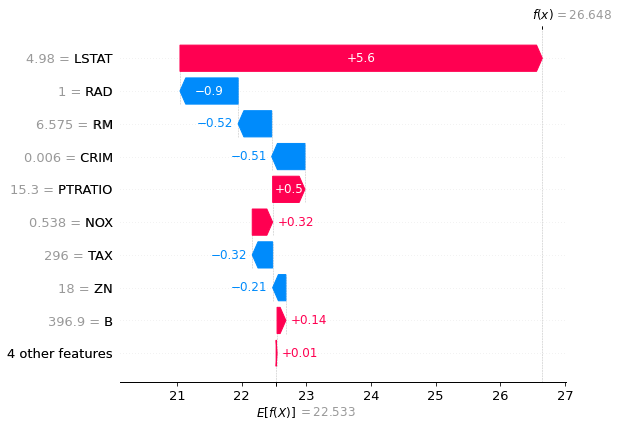

In [114]:
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

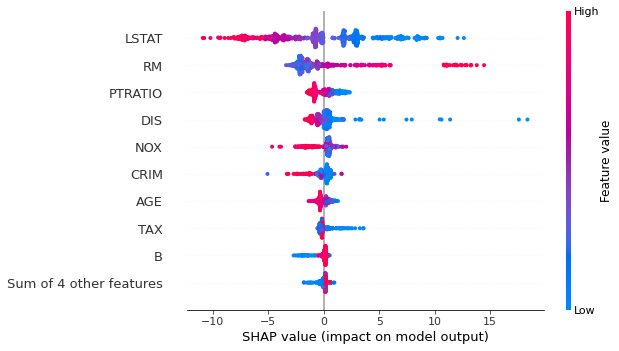

In [116]:
shap.plots.beeswarm(shap_values)

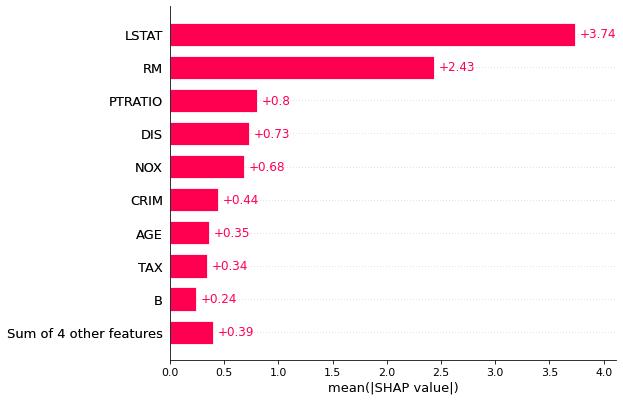

In [117]:
shap.plots.bar(shap_values)